In [1]:
# TIME SERIES FORECASTING


In [2]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [3]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

In [4]:
sales = pd.read_csv('sales-cars.csv', parse_dates=[0], index_col='Month')
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [5]:
sales.Sales


Month
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180
2016-06-01    169
2016-07-01    232
2016-08-01    225
2016-09-01    193
2016-10-01    123
2016-11-01    337
2016-12-01    186
2017-01-01    194
2017-02-01    150
2017-03-01    210
2017-04-01    273
2017-05-01    191
2017-06-01    287
2017-07-01    226
2017-08-01    304
2017-09-01    290
2017-10-01    422
2017-11-01    265
2017-12-01    342
2018-01-01    340
2018-02-01    440
2018-03-01    316
2018-04-01    439
2018-05-01    401
2018-06-01    390
2018-07-01    490
2018-08-01    408
2018-09-01    490
2018-10-01    420
2018-11-01    520
2018-12-01    480
Name: Sales, dtype: int64

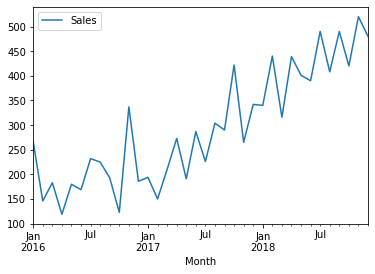

In [6]:
sales.plot()

In [11]:
sales_diff_1 = sales.diff(periods = 1)
sales_diff_1 = sales_diff_1[1:]
sales_diff_1.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


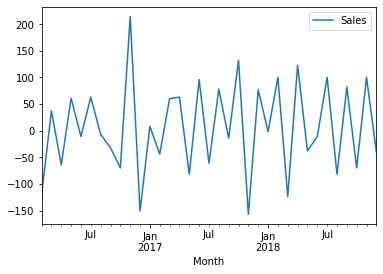

In [12]:
sales_diff_1.plot()

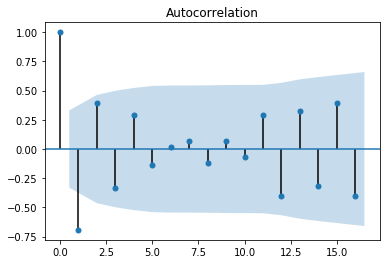

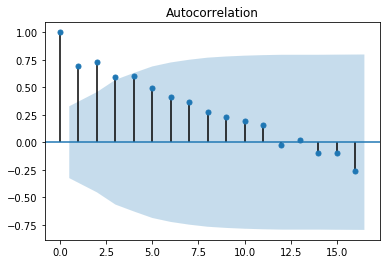

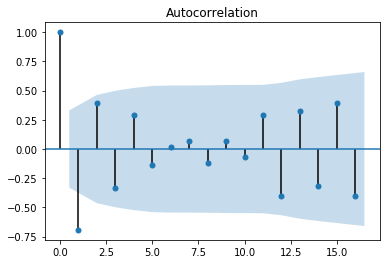

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)
plot_acf(sales_diff_1)

In [26]:
# AutoRegressive Model

X = sales.values
train = X[0:27]
test = X[27:]

In [33]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit=model_ar.fit()
predictions_ar = model_ar_fit.predict(start = 26,end = 36)

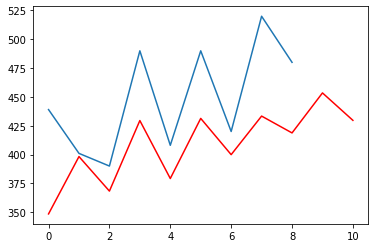

In [34]:
plt.plot(test)
plt.plot(predictions,color = 'red')

In [49]:
# ARIMA Model

from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order = (4,2,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
predictions_arima = model_arima_fit.forecast(steps = 9)[0]

291.39913447175024


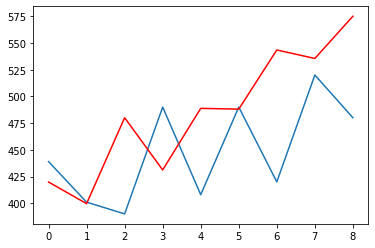

In [50]:
plt.plot(test)
plt.plot(predictions_arima,color = 'red')

In [48]:
import itertools
import warnings
warnings.filterwarnings('ignore')
p = d = q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq
for parameter in pdq:
    try:
        model_arima = ARIMA(train,order = parameter)
        model_arima_fit = model_arima.fit()
        print(parameter,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.40758681554314
(4, 0, 0) 311.0706562039329
(4, 0, 1) 321.8309391983909
(4, 1, 0) 295.93436313519135
(4, 1, 1) 297.9098817